In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
import sys

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path :
    sys.path.append(module_path)

    
import _ressources.chain as chain
import _ressources.tools as tools
import _ressources.lumenclass as lc

from scipy.optimize import curve_fit


main_dir = '/Users/mathieuleverge/git/chain_lumen/_data/pumping/'

In [39]:
def calc_mu(theta) :
    return np.sin(theta)**2 / (2*theta - np.sin(2*theta))

def calc_chi(theta, gamma, kappa, ell0, L0) :
    mu = calc_mu(theta)
    return 0.5*mu*np.sin(theta)*gamma*kappa / (ell0*L0**3)
    #return gamma*kappa / (ell0*L0**3)

def calc_chi(theta, eps, kappa, ell0, L0) :
    mu = calc_mu(theta)
    return 0.5*mu*np.sin(theta)*eps*kappa / (ell0*L0**3)
    #return mu*np.sin(theta)*eps / (L0*ell0**3)


def lin(x, a, b) :
    return a*x+b

def fit_lin(t, N) :
    x, y = np.log(t), np.log(N)
    popt, pcov = curve_fit(lin, x, y)
    alpha, kappa = popt[0], np.exp(popt[1])
    alpha_std, kappa_std = pcov[0, 0], np.exp(pcov[1, 1])
    return kappa, alpha#, kappa_std, alpha_std
    

In [51]:
def plot_pumping(ca, path_list, plot_param_list, Nt_list) :
    label = False
    Nt_list[ca] = {}
    for n in range(nsim) :
        Nt_list[ca][n] = np.loadtxt(os.path.join(path_list[ca][n], 'sim_nlum.dat'))
        if label :
            plt.plot(Nt_list[ca][n][:, 0], Nt_list[ca][n][:, 1], color=plot_param_list[ca][0], marker=plot_param_list[ca][1], markersize=plot_param_list[ca][2], linewidth=plot_param_list[ca][3])
        else :
            label = True
            plt.plot(Nt_list[ca][n][:, 0], Nt_list[ca][n][:, 1], color=plot_param_list[ca][0], marker=plot_param_list[ca][1], markersize=plot_param_list[ca][2], linewidth=plot_param_list[ca][3], label = r'$\Lambda_v$ = '+ str(ca))
    return Nt_list[ca]



# N(0) = 100

In [43]:
subdir = 'N100/ell10'
nsim=5

path_list_N100 = {}

# ca = 0
ca = 0
path_list_N100[ca] = {}
for n in range(nsim) :
    path_list_N100[ca][n] = os.path.join(main_dir, subdir, 'run'+str(ca)+'_'+str(n).zfill(4))

ca = 1e0
path_list_N100[ca] = {}
for n in range(nsim) :
    path_list_N100[ca][n] = os.path.join(main_dir, subdir, 'run1e0_'+str(n).zfill(4))
    
# ca = 1e-1
ca = 1e-1
path_list_N100[ca] = {}
for n in range(nsim) :
    path_list_N100[ca][n] = os.path.join(main_dir, subdir, 'run1e-1_'+str(n).zfill(4))
    
# ca = 1e-2
ca = 1e-2
path_list_N100[ca] = {}
for n in range(nsim) :
    path_list_N100[ca][n] = os.path.join(main_dir, subdir, 'run1e-2_'+str(n).zfill(4))
    
# ca = 1e-3
ca = 1e-3
path_list_N100[ca] = {}
for n in range(nsim) :
    path_list_N100[ca][n] = os.path.join(main_dir, subdir, 'run1e-3_'+str(n).zfill(4))
    
# ca = 1e-4
ca = 1e-4
path_list_N100[ca] = {}
for n in range(nsim) :
    path_list_N100[ca][n] = os.path.join(main_dir, subdir, 'run1e-4_'+str(n).zfill(4))

# ca = 1e-5
ca = 1e-5
path_list_N100[ca] = {}
for n in range(nsim) :
    path_list_N100[ca][n] = os.path.join(main_dir, subdir, 'run1e-5_'+str(n).zfill(4))
    

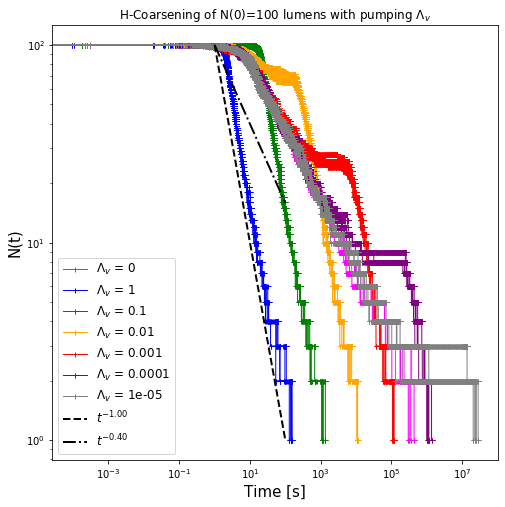

In [44]:
lw = 1
ms = 5

plot_param_list = {0 : ['magenta', '+', ms, lw], 
                   1 : ['blue', '+', ms, lw], 
                   1e-1 : ['green', '+', ms, lw], 
                   1e-2 : ['orange', '+', ms, lw], 
                   1e-3 :['red', '+', ms, lw], 
                   1e-4 :['purple', '+', ms, lw], 
                   1e-5 :['grey', '+', ms, lw]}

plt.figure(figsize=(8, 8))

plt.xscale('log')
plt.yscale('log')

nopump = 1
pump1e_0, pump1e_1, pump1e_2, pump1e_3, pump1e_4, pump1e_5 = 1, 1, 1, 1, 1, 1

Nt_list_N100 = {}

if nopump :
    ca = 0
    Nt_list_N100[ca] = plot_pumping(ca, path_list_N100, plot_param_list, Nt_list_N100)

if pump1e_0 :
    ca = 1
    Nt_list_N100[ca] = plot_pumping(ca, path_list_N100, plot_param_list, Nt_list_N100)
        
if pump1e_1 :
    ca = 1e-1
    Nt_list_N100[ca] = plot_pumping(ca, path_list_N100, plot_param_list, Nt_list_N100)
    
if pump1e_2 :
    ca = 1e-2
    Nt_list_N100[ca] = plot_pumping(ca, path_list_N100, plot_param_list, Nt_list_N100)
    
if pump1e_3 :
    ca = 1e-3
    Nt_list_N100[ca] = plot_pumping(ca, path_list_N100, plot_param_list, Nt_list_N100)
    
if pump1e_4 :
    ca = 1e-4
    Nt_list_N100[ca] = plot_pumping(ca, path_list_N100, plot_param_list, Nt_list_N100)
    
if pump1e_5 :
    ca = 1e-5
    Nt_list_N100[ca] = plot_pumping(ca, path_list_N100, plot_param_list, Nt_list_N100)



k1, a1 = 100, -1.
t1 = np.logspace(0, 2, 101)
plt.plot(t1, k1*t1**a1, label = r'$t^{'+"{:2.2f}".format(a1)+'}$', linewidth=2, linestyle='--', color = 'k')

k2, a2 = 100, -2./5.
t2 = np.logspace(0, 2, 101)
plt.plot(t2, k2*t2**a2, label = r'$t^{'+"{:2.2f}".format(a2)+'}$', linewidth=2, linestyle='-.', color = 'k')

plt.legend(loc=3, fontsize=12)

#plt.xlim(1e-1, 1e4)

plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('N(t)', fontsize=15)

plt.title(r'H-Coarsening of N(0)=100 lumens with pumping $\Lambda_v$')

plt.show()






Import successful !


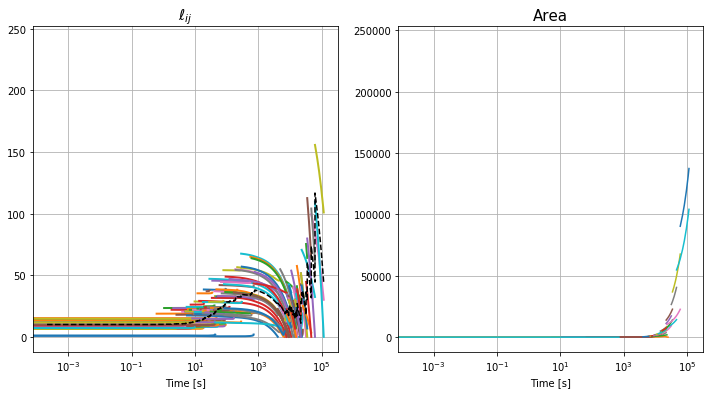

In [6]:

path_0 = os.path.join(main_dir, 'N100', 'ell10', 'run1e-3_0000')
L_pump_0, pos_pump_0 = tools.load_file(os.path.join(path_0, 'sim_all.dat'), hydroosmotic=False)
#L_pump_1, pos_pump_1 = tools.load_file(os.path.join(path_1, 'sim_all.dat'), hydroosmotic=False)
#L_pump_2, pos_pump_2 = tools.load_file(os.path.join(path_2, 'sim_all.dat'), hydroosmotic=False)

ell_pump_0 = tools.load_brfile(os.path.join(path_0, 'sim_bridges.dat'))
#ell_pump_1 = tools.load_brfile(os.path.join(path_1, 'sim_bridges.dat'))
#ell_pump_2 = tools.load_brfile(os.patwh.join(path_2, 'sim_bridges.dat'))

#savename = os.path.join(main_dir, '_data/osmotic_competition/osmotic_eq/no_screening/graphs.eps')




show_area=0
savefig=False
x_log = 1
y_log = 0

tools.plot_evolution_hydraulic(L_pump_0, ell_pump_0, savename='', show_totalarea=show_area, savefig=savefig, x_logscale=x_log, y_logscale=y_log, figsize=(12, 6))
#tools.plot_evolution_hydraulic(L_pump_1, ell_pump_1, savename='', show_totalarea=show_area, savefig=savefig, x_logscale=x_log, figsize=(12, 6))
#tools.plot_evolution_hydraulic(L_pump_2, ell_pump_2, savename='', show_totalarea=show_area, savefig=savefig, x_logscale=x_log, figsize=(12, 6))




## Distribution

# N(0) = 1000

In [48]:
subdir = 'N1000/ell10'
nsim=20 

path_list_N1000 = {}

# ca = 0
ca = 0
subsubdir = 'ca0'
path_list_N1000[ca] = {}
for n in range(nsim) :
    path_list_N1000[0][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))

# ca = 1
ca = 1
subsubdir = 'ca1e0'
path_list_N1000[ca] = {}
for n in range(nsim) :
    path_list_N1000[ca][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))    

# ca = 1e-1
ca = 1e-1
subsubdir = 'ca1e-1'
path_list_N1000[ca] = {}
for n in range(nsim) :
    path_list_N1000[ca][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# ca = 1e-2
ca = 1e-2
subsubdir = 'ca1e-2'
path_list_N1000[ca] = {}
for n in range(nsim) :
    path_list_N1000[ca][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# ca = 1e-3
ca = 1e-3
subsubdir = 'ca1e-3'
path_list_N1000[ca] = {}
for n in range(nsim) :
    path_list_N1000[ca][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# ca = 1e-4
ca = 1e-4
subsubdir = 'ca1e-4'
path_list_N1000[ca] = {}
for n in range(nsim) :
    path_list_N1000[ca][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))
    
# ca = 1e-5
ca = 1e-5
subsubdir = 'ca1e-5'
path_list_N1000[ca] = {}
for n in range(nsim) :
    path_list_N1000[ca][n] = os.path.join(main_dir, subdir, subsubdir, 'run'+str(n).zfill(4))


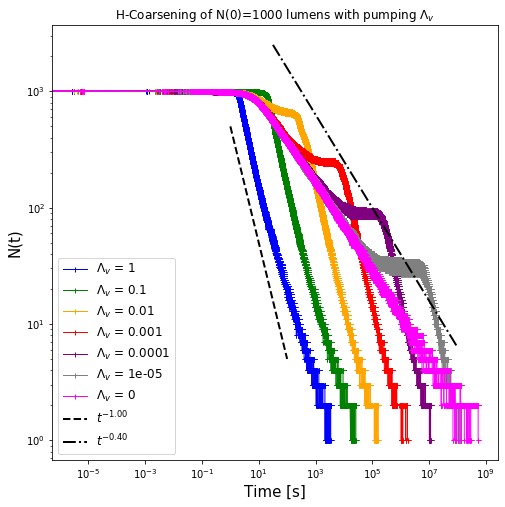

In [65]:
lw = 1
ms = 5

plot_param_list = {0 : ['magenta', '+', ms, lw], 
                   1 : ['blue', '+', ms, lw], 
                   1e-1 : ['green', '+', ms, lw], 
                   1e-2 : ['orange', '+', ms, lw], 
                   1e-3 :['red', '+', ms, lw], 
                   1e-4 :['purple', '+', ms, lw], 
                   1e-5 :['grey', '+', ms, lw]}

plt.figure(figsize=(8, 8))

plt.xscale('log')
plt.yscale('log')

nopump = 1
pump1e_0, pump1e_1, pump1e_2, pump1e_3, pump1e_4, pump1e_5 = 1, 1, 1, 1, 1, 1

Nt_list_N1000 = {}

if pump1e_0 :
    ca = 1
    Nt_list_N1000[ca] = plot_pumping(ca, path_list_N1000, plot_param_list, Nt_list_N1000)

        
if pump1e_1 :
    ca = 1e-1
    Nt_list_N1000[ca] = plot_pumping(ca, path_list_N1000, plot_param_list, Nt_list_N1000)

    
if pump1e_2 :
    ca = 1e-2
    Nt_list_N1000[ca] = plot_pumping(ca, path_list_N1000, plot_param_list, Nt_list_N1000)
    
if pump1e_3 :
    ca = 1e-3
    Nt_list_N1000[ca] = plot_pumping(ca, path_list_N1000, plot_param_list, Nt_list_N1000)
    
if pump1e_4 :
    ca = 1e-4
    Nt_list_N1000[ca] = plot_pumping(ca, path_list_N1000, plot_param_list, Nt_list_N1000)
    
if pump1e_5 :
    ca = 1e-5
    Nt_list_N1000[ca] = plot_pumping(ca, path_list_N1000, plot_param_list, Nt_list_N1000)

if nopump :
    ca = 0
    Nt_list_N1000[ca] = plot_pumping(ca, path_list_N1000, plot_param_list, Nt_list_N1000)

k1, a1 = 500, -1.
t1 = np.logspace(0, 2, 101)
plt.plot(t1, k1*t1**a1, label = r'$t^{'+"{:2.2f}".format(a1)+'}$', linewidth=2, linestyle='--', color = 'k')

k2, a2 = 10000, -2./5.
t2 = np.logspace(1.5, 8, 101)
plt.plot(t2, k2*t2**a2, label = r'$t^{'+"{:2.2f}".format(a2)+'}$', linewidth=2, linestyle='-.', color = 'k')

plt.legend(loc=3, fontsize=12)

#plt.xlim(1e6, 1e7)

plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('N(t)', fontsize=15)

plt.title(r'H-Coarsening of N(0)=1000 lumens with pumping $\Lambda_v$', fontsize=15)

plt.show()


